In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords


2018-05-04 18:35:20,671 : INFO : 'pattern' package not found; tag filters are not available for English
/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [4]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(data.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [5]:
train_batch = train_data[0:3000]

In [6]:
%%time
n_gram_vectorizer = HashingVectorizer(
    analyzer="char",
    ngram_range=([2,5]),
    tokenizer=nltk.word_tokenize,
    n_features=3000,
    preprocessor=None)

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

CPU times: user 43 µs, sys: 4 µs, total: 47 µs
Wall time: 51.5 µs


In [7]:
%%time
train_data_features = n_gram_vectorizer.fit_transform(train_batch.text)

CPU times: user 3.7 s, sys: 55.4 ms, total: 3.75 s
Wall time: 3.76 s


In [8]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=3, C=1e5)
logreg = logreg.fit(train_data_features, train_batch.stars)

/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(self.n_jobs))


CPU times: user 7.21 s, sys: 7.26 ms, total: 7.21 s
Wall time: 7.53 s


accuracy 0.525866164927685
confusion matrix
 [[ 8560  1682  1015  1306  1835]
 [ 2266  1811  1740  1656  1149]
 [ 1141  1746  3126  4077  2250]
 [  846  1278  2855  9383 10301]
 [ 1261   894  1587  9010 32459]]
(row=expected, col=predicted)
CPU times: user 2min 8s, sys: 2.57 s, total: 2min 10s
Wall time: 6min 33s


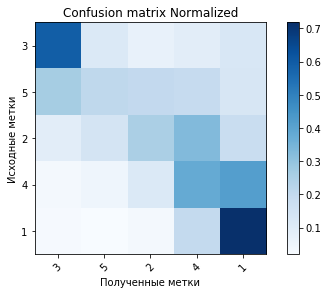

In [10]:
%%time
predict(n_gram_vectorizer, logreg, test_data)